# Brief notebook to examine the detections from the SR model images

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits
from photutils.segmentation import SourceCatalog
from photutils import SegmentationImage
import quicklook as jql
import jades_photutils_interface as jpui
import time

In [7]:
#load the detection images
fname_hst = 'results/hst_results/hst10000.fits.output.fits'
data_hst, segm_hst_data, cdata_hst = jpui.ReadSourceCatalogImages(fname_hst)

fname_sr = 'results/sr_results/sr10000.fits.output.fits'
data_sr, segm_sr_data, cdata_sr = jpui.ReadSourceCatalogImages(fname_sr)

### reconstruct the catalogs

In [8]:
#hst
time_start = time.time()
segm_hst = SegmentationImage(segm_hst_data)
cat_hst = SourceCatalog(data_hst, segm_hst, convolved_data=cdata_hst)
time_end = time.time()
print(f"Time to compute catalog from catalog images = {time_end-time_start}")

Time to compute catalog from catalog images = 0.4731729030609131


In [9]:
#sr
time_start = time.time()
segm_sr = SegmentationImage(segm_sr_data)
cat_sr = SourceCatalog(data_sr, segm_sr, convolved_data=cdata_sr)
time_end = time.time()
print(f"Time to compute catalog from catalog images = {time_end-time_start}")

Time to compute catalog from catalog images = 0.003522634506225586


### Make simple tables from the catalogs

In [10]:
# What columns should we use?

columns = ['xcentroid','ycentroid','area','semimajor_sigma','semiminor_sigma','orientation','eccentricity','min_value','max_value', 'segment_flux', 'kron_flux','kron_radius','gini','fwhm','cxx','cxy','cyy']

tbl_hst = cat_hst.to_table(columns=columns)
tbl_sr  = cat_sr.to_table(columns=columns)

In [11]:
#sort by segment flux, in descending order

In [12]:
tbl_hst = tbl_hst[np.argsort(-1*tbl_hst[:]['segment_flux'])]
tbl_sr  = tbl_sr[np.argsort(-1*tbl_sr[:]['segment_flux'])]

### plot the flux images

(<Figure size 1440x1440 with 1 Axes>, <AxesSubplot:>)

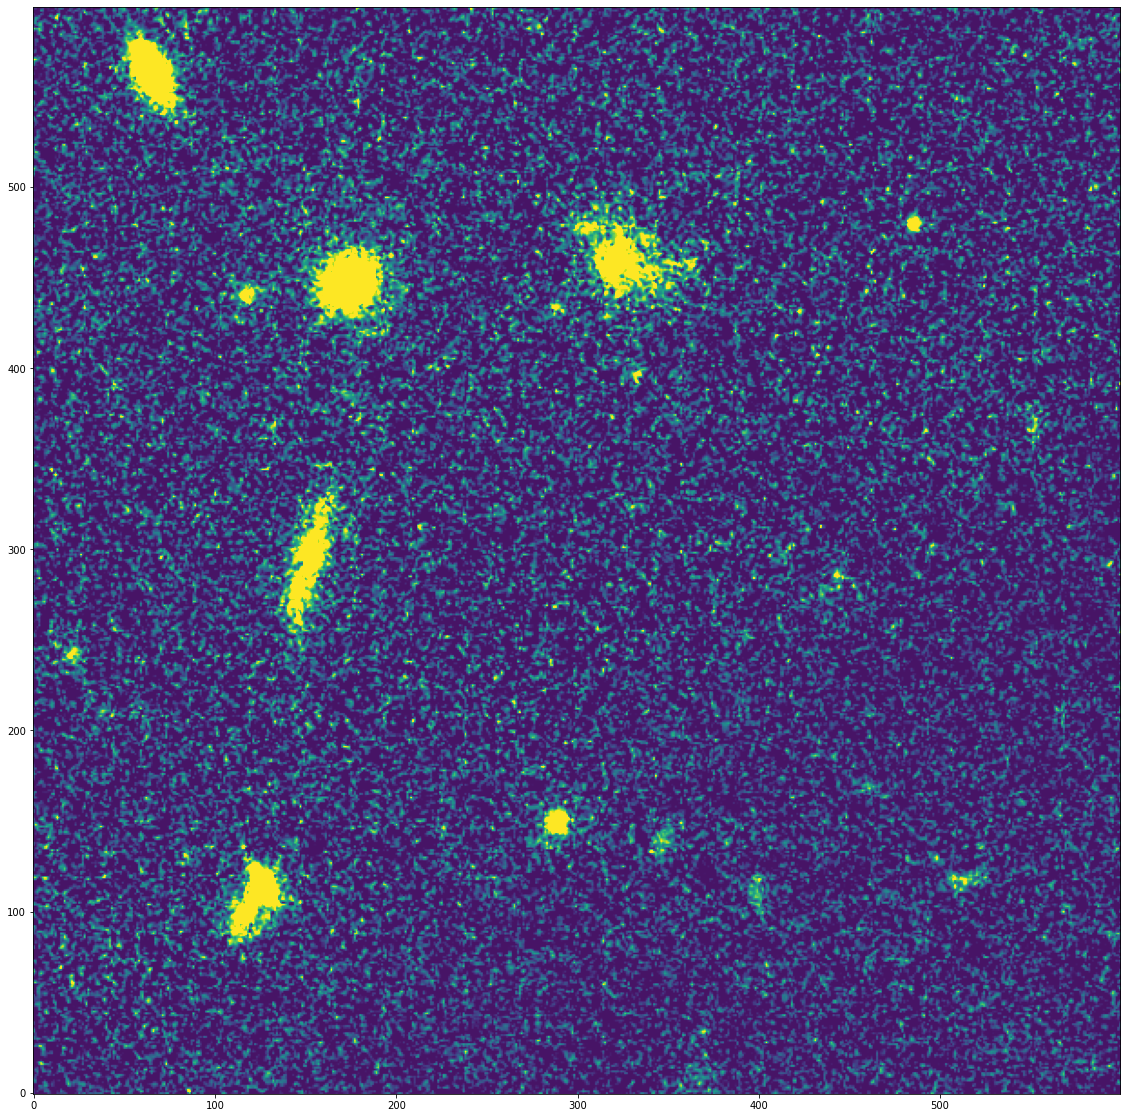

In [13]:
#HST
jql.imshow(data_hst,fnx=20,fny=20)

(<Figure size 1440x1440 with 1 Axes>, <AxesSubplot:>)

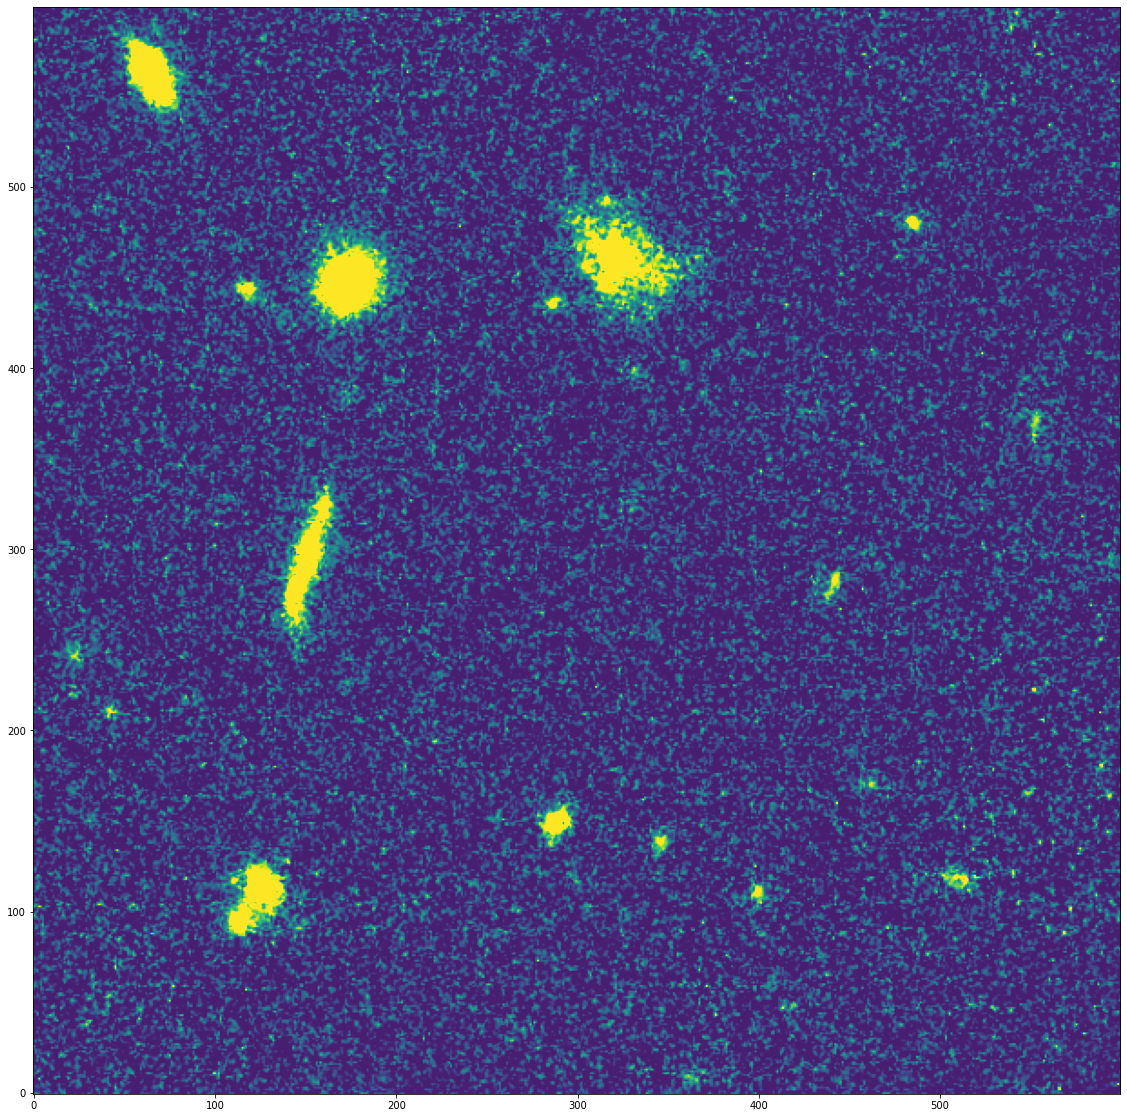

In [14]:
#SR
jql.imshow(data_sr,fnx=20,fny=20)

### plot the segmentation maps

(0.0, 600.0)

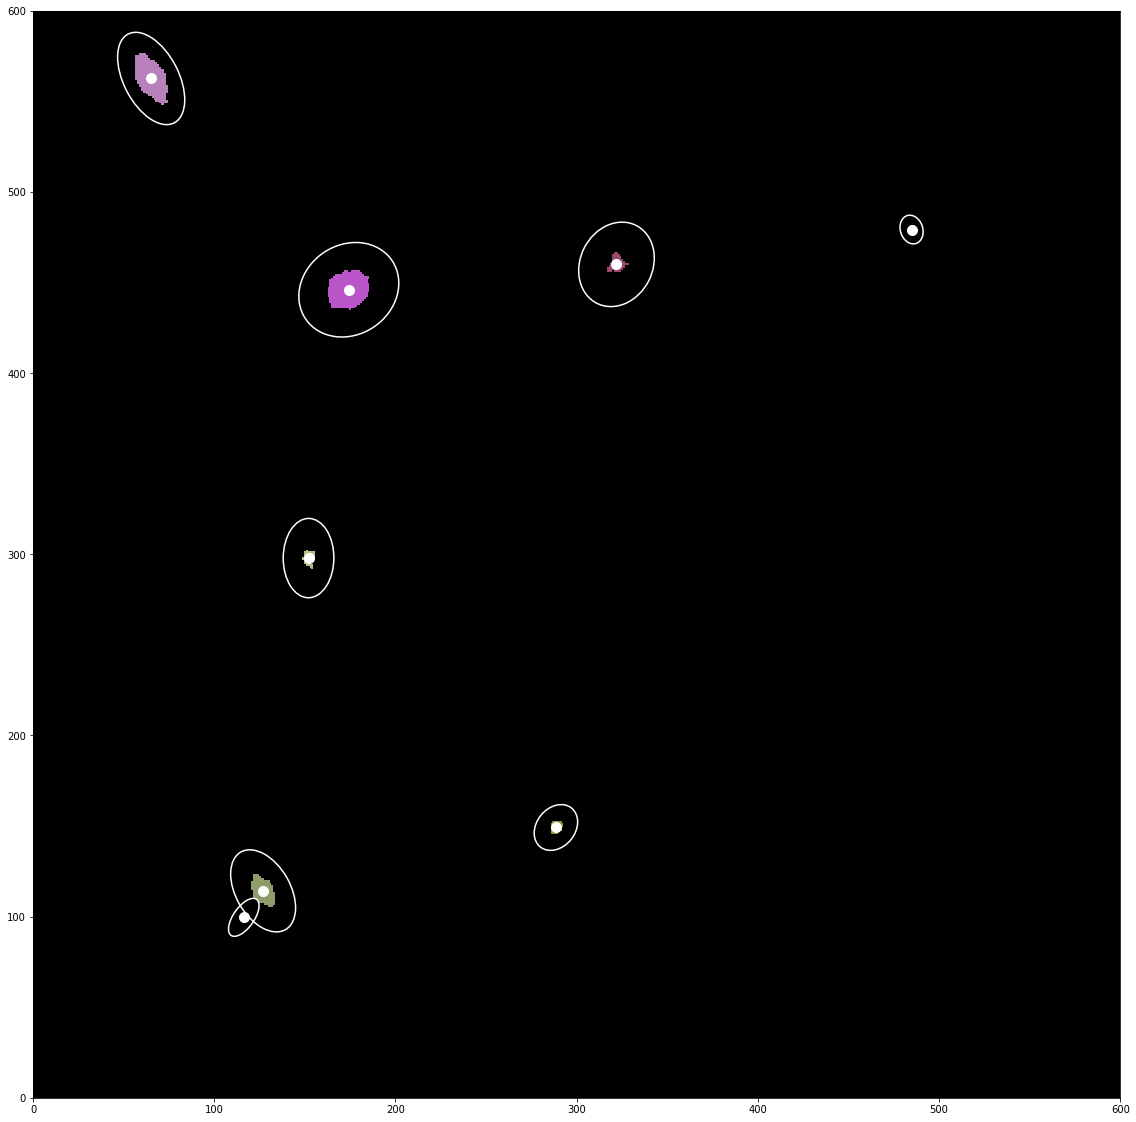

In [15]:
#HST

cmap = segm_hst.make_cmap(seed=123)

f, ax  = plt.subplots(1,1,figsize=(20,20))
ax.imshow(segm_hst.data, cmap=cmap, interpolation='nearest',origin='lower');
plt.plot(tbl_hst[:]['xcentroid'],tbl_hst[:]['ycentroid'],'o',ms=10,color='white')

cat_hst.plot_kron_apertures((2.5, 2.0), axes=plt.gca(), color='white', lw=1.5);

plt.ylim([0,segm_hst.data.shape[1]])
plt.xlim([0,segm_hst.data.shape[0]])


(0.0, 600.0)

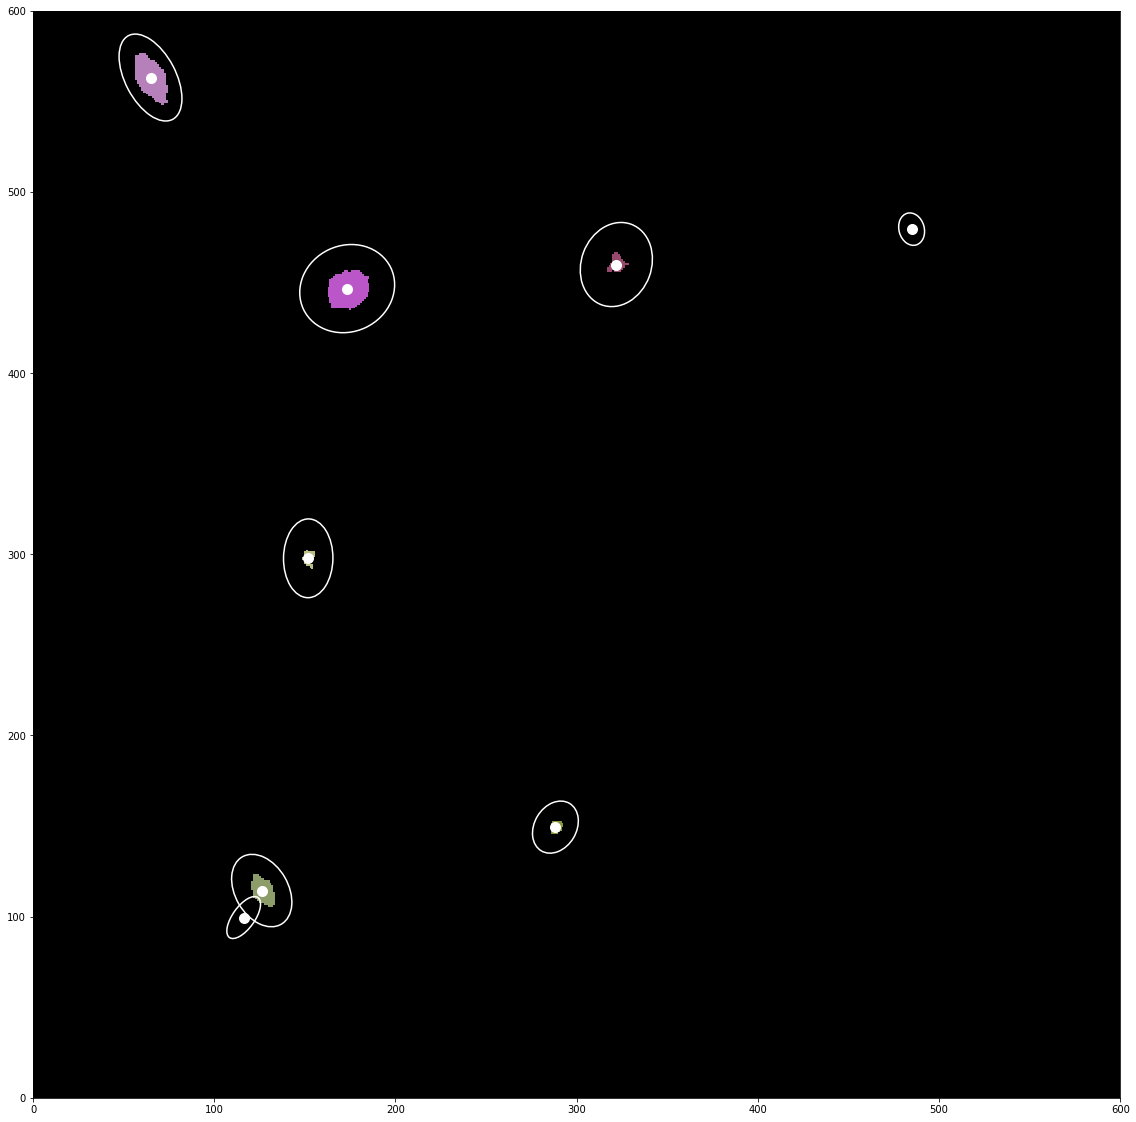

In [16]:
#HST

cmap = segm_sr.make_cmap(seed=123)

f, ax  = plt.subplots(1,1,figsize=(20,20))
ax.imshow(segm_sr.data, cmap=cmap, interpolation='nearest',origin='lower');
plt.plot(tbl_sr[:]['xcentroid'],tbl_sr[:]['ycentroid'],'o',ms=10,color='white')

cat_sr.plot_kron_apertures((2.5, 2.0), axes=plt.gca(), color='white', lw=1.5);

plt.ylim([0,segm_sr.data.shape[1]])
plt.xlim([0,segm_sr.data.shape[0]])

### print the tabular catalogs

In [12]:
#HST image
print(tbl_hst)

    xcentroid          ycentroid       area   semimajor_sigma    semiminor_sigma   ...         gini               fwhm                cxx                   cxy                  cyy         
                                       pix2         pix                pix         ...                            pix               1 / pix2              1 / pix2             1 / pix2      
------------------ ------------------ ------ ------------------ ------------------ ... ------------------- ------------------ -------------------- --------------------- --------------------
 273.3060287547272 198.02940827609189 1494.0 13.971577059752672 6.1469526747170695 ... 0.30567978553156605  25.41624335371462 0.009234436164101216  0.016834197504540564 0.022353893948007606
123.91453989705624  310.7832196504212   97.0 2.7661816733777016 2.1312786028963635 ...   0.262015729137466   5.81457226025862  0.21781552646347352 -0.028525979821381837  0.13302377907627422
 582.2194174741239  478.4522552855749   37.0 1.890

In [13]:
#SR Image
print(tbl_sr)

    xcentroid          ycentroid       area   semimajor_sigma    semiminor_sigma   ...         gini               fwhm                cxx                   cxy                  cyy        
                                       pix2         pix                pix         ...                            pix               1 / pix2              1 / pix2             1 / pix2     
------------------ ------------------ ------ ------------------ ------------------ ... ------------------- ------------------ -------------------- --------------------- -------------------
272.29177984691563 197.43563091333283 1494.0 13.808244290900964   5.78376307848511 ...  0.3687532910628028  24.92772090494835 0.009424882595335277  0.018500011314408142 0.02571350119656381
  124.117510758396  311.4757414947045   97.0  3.198005774753839 2.3553334787120304 ... 0.13343956873626478  6.613405659444908  0.17844907739134164  -0.02416187626053535 0.09958727057796492
 582.2786849607832  478.4841621711179   37.0  1.9893961

In [14]:
### Make some comparison plots

Text(0, 0.5, 'SR Flux')

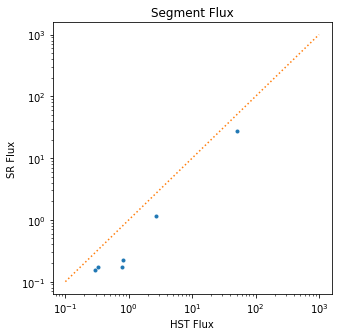

In [15]:
f=plt.figure(figsize=(5,5))
plt.plot( tbl_hst[:]['segment_flux'],tbl_sr[:]['segment_flux'],'.')

x = 10**(np.linspace(-1,3,100))
y = x.copy()
plt.plot(x,y,':')

plt.title("Segment Flux")
plt.xscale('log')
plt.yscale('log')
plt.xlabel('HST Flux')
plt.ylabel('SR Flux')

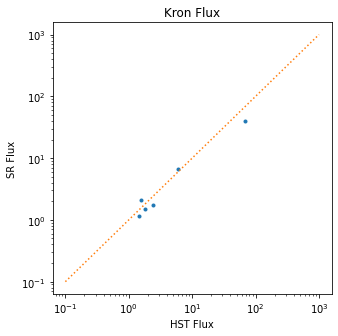

In [16]:
f=plt.figure(figsize=(5,5))
plt.plot( tbl_hst[:]['kron_flux'],tbl_sr[:]['kron_flux'],'.')

x = 10**(np.linspace(-1,3,100))
y = x.copy()
plt.plot(x,y,':')

plt.title("Kron Flux")
plt.xscale('log')
plt.yscale('log')
plt.xlabel('HST Flux');
plt.ylabel('SR Flux');


(1, 10)

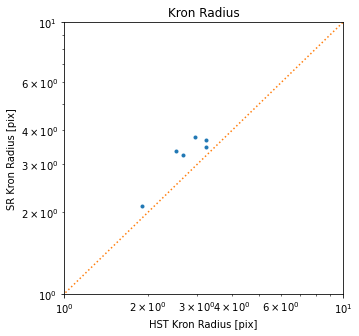

In [17]:
f=plt.figure(figsize=(5,5))
plt.plot( tbl_hst[:]['kron_radius'],tbl_sr[:]['kron_radius'],'.')

x = 10**(np.linspace(-1,3,100))
y = x.copy()
plt.plot(x,y,':')

plt.title("Kron Radius")
plt.xscale('log')
plt.yscale('log')
plt.xlabel('HST Kron Radius [pix]');
plt.ylabel('SR Kron Radius [pix]');
plt.xlim([1,10])
plt.ylim([1,10])

(0.01, 1)

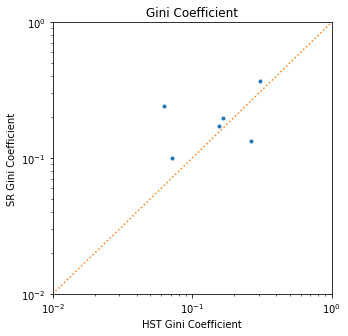

In [18]:
f=plt.figure(figsize=(5,5))
plt.plot( tbl_hst[:]['gini'],tbl_sr[:]['gini'],'.')

x = 10**(np.linspace(-2,3,100))
y = x.copy()
plt.plot(x,y,':')

plt.title("Gini Coefficient")
plt.xscale('log')
plt.yscale('log')
plt.xlabel('HST Gini Coefficient');
plt.ylabel('SR Gini Coefficient');
plt.xlim([1e-2,1])
plt.ylim([1e-2,1])